<a href="https://colab.research.google.com/github/CKhumba/CKhumba/blob/main/Zomata_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importing Libraries**


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
!pip install chardet

In [6]:
import chardet

In [13]:
with open ("/content/drive/MyDrive/DB/zomato/zomato.csv","rb") as f:
  encoding=chardet.detect(f.read())["encoding"]


In [14]:
df=pd.read_csv("/content/drive/MyDrive/DB/zomato/zomato.csv",encoding=encoding)

In [15]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [16]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

## Remove unnecessary columns


In [18]:
#df=df.drop(['Restaurant ID','Restaurant Name'],axis=1)

In [19]:
#df=df.drop(['Country Code', 'City','Locality', 'Locality Verbose',],axis=1)

In [20]:
df.shape

(9551, 21)

In [21]:
df.isna().sum()   #.count()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

##  Data Cleaning

In [22]:
# check which columns has null values
null_percent=df.isnull().sum().sum()/(df.shape[0]*df.shape[1])*100
print(f'Total null percentage is {null_percent}')

Total null percentage is 0.004487189075190331


In [23]:
df["Aggregate rating"].unique()

array([4.8, 4.5, 4.4, 4.9, 4. , 4.2, 4.3, 3.6, 4.7, 3. , 3.8, 3.7, 3.2,
       3.1, 0. , 4.1, 3.3, 4.6, 3.9, 3.4, 3.5, 2.2, 2.9, 2.4, 2.6, 2.8,
       2.1, 2.7, 2.5, 1.8, 2. , 2.3, 1.9])

In [24]:
df["Aggregate rating"].describe()

count    9551.000000
mean        2.666370
std         1.516378
min         0.000000
25%         2.500000
50%         3.200000
75%         3.700000
max         4.900000
Name: Aggregate rating, dtype: float64

## Average Rating for each restaurant

In [25]:
ratings=pd.pivot_table(df,index="Restaurant Name",values="Aggregate rating")
# by default it will give the avg/mean values for values

In [26]:
# change  Aggregate rating to Avg rating

ratings.rename(columns={'Aggregate rating': 'Avg rating'}, inplace=True)


In [27]:
ratings_asc=ratings.sort_values(by="Avg rating",ascending=False)
ratings_asc

,Avg rating
Restaurant Name,
Caterspoint,4.9
Mazzaro's Italian Market,4.9
Sagar Gaire Fast Food,4.9
McGuire's Irish Pub & Brewery,4.9
Milse,4.9
...,...
Malt n Brew,0.0
Mama Bhanja Corner,0.0
Mama Tao,0.0


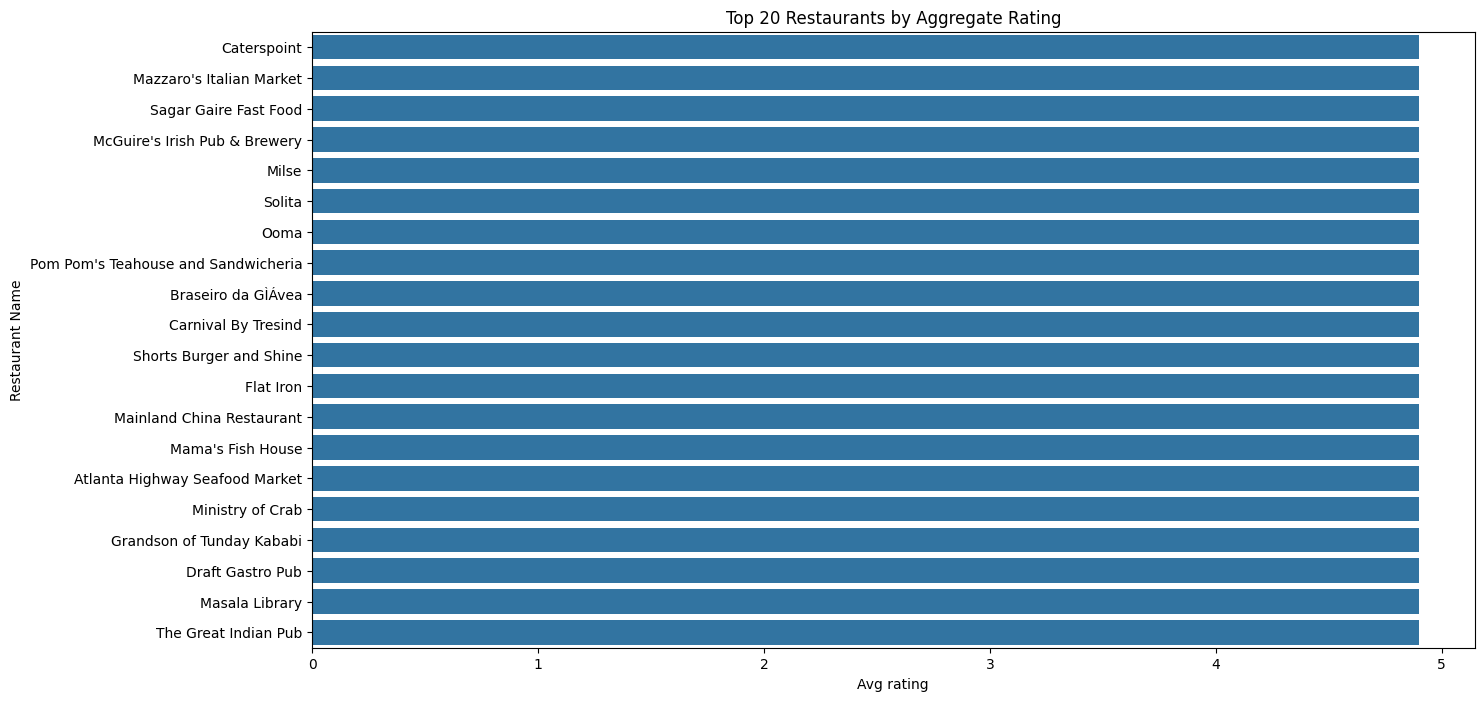

In [28]:
plt.figure(figsize=(15,8))
sns.barplot(x=ratings_asc[0:20]["Avg rating"],y=ratings_asc[0:20].index, orient="h")
plt.title('Top 20 Restaurants by Aggregate Rating')
plt.xlabel('Avg rating')
plt.ylabel('Restaurant Name')
plt.show()

## Distribution of the ratings

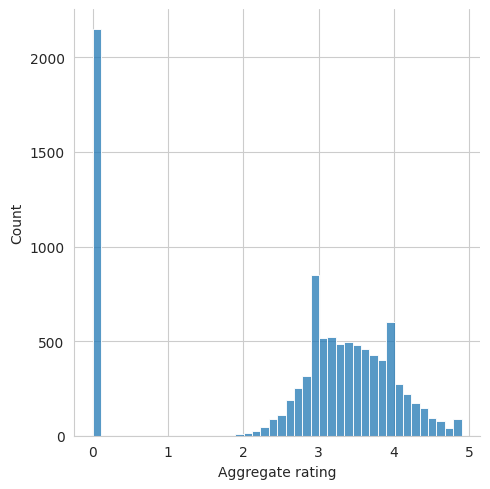

In [29]:
sns.set_style('whitegrid')
sns.displot(df['Aggregate rating'])
plt.show()


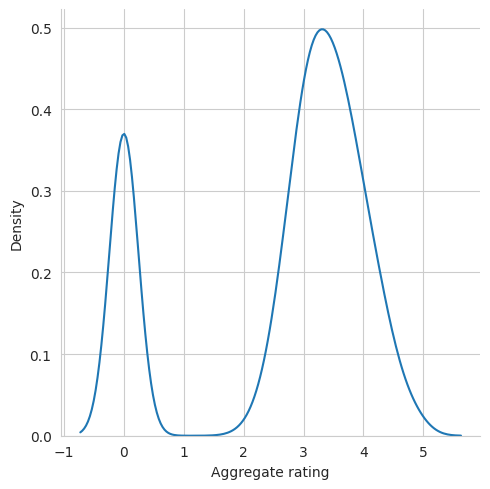

In [30]:
# using other methiods to check normality
sns.displot(df['Aggregate rating'],kind='kde')
plt.show()

Checking using p-value

In [31]:
from scipy.stats import normaltest
DataToTest=df['Aggregate rating']
stat,p=normaltest(DataToTest)
print("stat=",stat,"p=",p)
if p>0.05:
  print("Normal Distribution")
else :
  print("Not a Normal Distributuion")

stat= 1336.1749214898414 p= 7.133495140474911e-291
Not a Normal Distributuion


This is not a normal distribution as we see a spike in "0"s

## Top Restaurant Chains


In [34]:
df["Restaurant Name"].value_counts()

Restaurant Name
Cafe Coffee Day             83
Domino's Pizza              79
Subway                      63
Green Chick Chop            51
McDonald's                  48
                            ..
Odeon Social                 1
Johnny Rockets               1
House of Commons             1
HotMess                      1
Walter's Coffee Roastery     1
Name: count, Length: 7446, dtype: int64

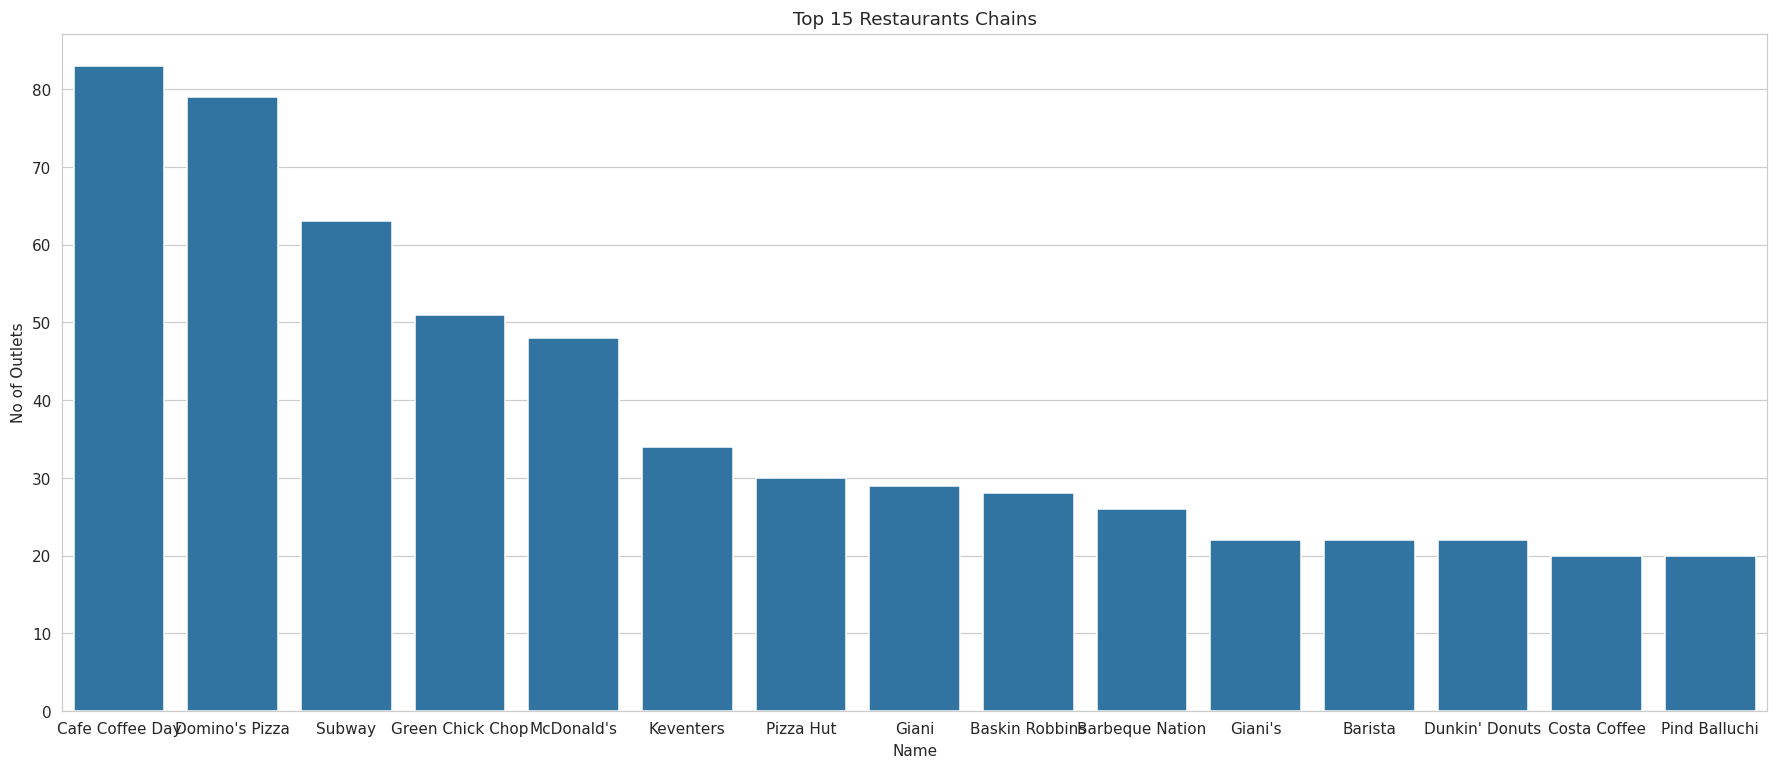

In [61]:
plt.figure(figsize=(20,8),dpi=110)

chain=df["Restaurant Name"].value_counts()[0:15]

sns.barplot(x=chain.index,y=chain)

plt.title('Top 15 Restaurants Chains')
plt.xlabel("Name")
plt.ylabel('No of Outlets')
plt.show()

## How many restaurants dont accept online orders

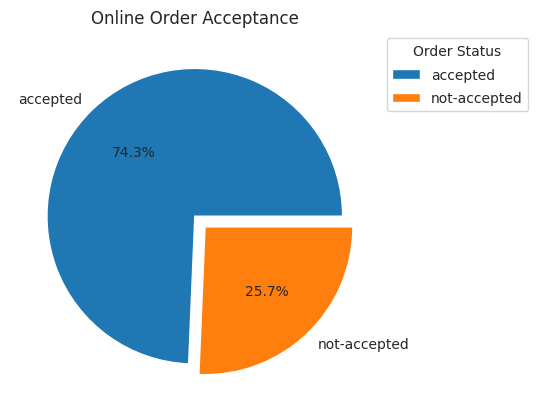

In [78]:
x = df["Has Online delivery"].value_counts()
labels = ['accepted', 'not-accepted']
plt.pie(x, labels=labels, explode=[0.0, 0.1], autopct='%1.1f%%')
plt.legend(title="Order Status", loc="best",bbox_to_anchor=(1, 1), labelspacing=0.7)
plt.title("Online Order Acceptance")

plt.show()

We see that 25.7% of the restaurant does not accept online order

In [64]:
x

Has Online delivery
No     7100
Yes    2451
Name: count, dtype: int64

## How many of them accept table bookings/


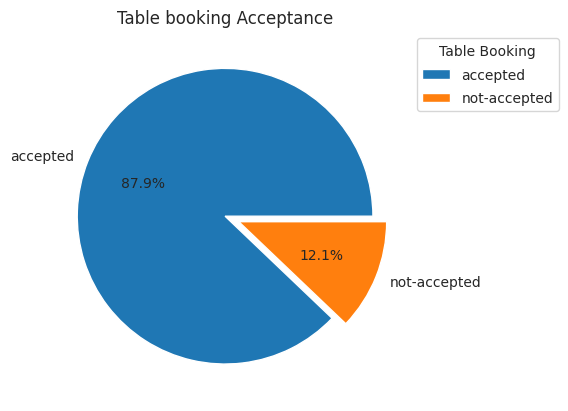

In [80]:
tb=df['Has Table booking'].value_counts()
labels = ['accepted', 'not-accepted']
plt.pie(tb,labels=labels,explode=[0.0, 0.1],autopct='%1.1f%%')

plt.legend(title="Table Booking", loc= "best",bbox_to_anchor=(1,1),labelspacing=0.7)
plt.title("Table booking Acceptance")

plt.show()

We see that 12.1% of the restaurant does not accept table booking.

In [32]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')